# Download Libraries

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install statsmodels


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Import Packages

In [5]:
import requests
from bs4 import BeautifulSoup
import pprint as p
import pandas as pd
import numpy as np
import re
pd.options.display.max_columns = None

In [70]:
print(np.__version__)

1.15.4


# Data Collection

## Web Scraping - Player Stats

### Define Columns

In [6]:
### pre use define format of data frame
list_ = ['rank', 'player', 'pos', 'age', 'team_id', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', 'field_goals_pct', '3points', '3points_attempts', '3points_pct', '2points', '2points_attempts', '2points_pct', 'efg_pct', 'free_throws', 'free_throws_attempts', 'free_throws_pct', 'orb', 'drb', 'trb', 'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls', 'points_per_game', 'year']
# col_names = player_df.columns
# print(list(col_names))
player_df_final = pd.DataFrame(columns=list_)
player_df_final

Empty DataFrame
Columns: [rank, player, pos, age, team_id, games, games_started, min_per_game, field_goals, field_goals_attempts, field_goals_pct, 3points, 3points_attempts, 3points_pct, 2points, 2points_attempts, 2points_pct, efg_pct, free_throws, free_throws_attempts, free_throws_pct, orb, drb, trb, assists, steals, blocks, turnovers, personal_fouls, points_per_game, year]
Index: []

### Scarping Function

In [10]:
def get_stats(tbody):
    player_dict = {'rank':[],'player':[], 'pos':[], 'age':[], 'team_id':[], 'games':[], 'games_started':[], 
               'min_per_game':[], 'field_goals':[], 'field_goals_attempts':[], 'field_goals_pct':[]
              ,'3points':[], '3points_attempts':[], '3points_pct':[],
              '2points':[], '2points_attempts':[], '2points_pct':[], 'efg_pct':[],
              'free_throws':[], 'free_throws_attempts':[], 'free_throws_pct':[],
              'orb':[], 'drb':[], 'trb':[],
              'assists':[], 'steals':[], 'blocks':[], 'turnovers':[], 'personal_fouls':[], 'points_per_game':[] }

    for test in tbody:
        try:

            player_dict['rank'].append(int(test.find('th', {'data-stat':'ranker'}).get_text()))
            player_dict['player'].append(test.find('td', {'data-stat':'player'}).get_text())
            player_dict['pos'].append(test.find('td', {'data-stat':'pos'}).get_text())
            player_dict['age'].append(test.find('td', {'data-stat':'age'}).get_text())
            player_dict['team_id'].append(test.find('td', {'data-stat':'team_id'}).get_text())
            player_dict['games'].append(test.find('td', {'data-stat':'g'}).get_text())
            player_dict['games_started'].append(test.find('td', {'data-stat':'gs'}).get_text())
            player_dict['min_per_game'].append(test.find('td', {'data-stat':'mp_per_g'}).get_text())
            player_dict['field_goals'].append(test.find('td', {'data-stat':'fg_per_g'}).get_text())
            player_dict['field_goals_attempts'].append(test.find('td', {'data-stat':'fga_per_g'}).get_text())
            player_dict['field_goals_pct'].append(test.find('td', {'data-stat':'fg_pct'}).get_text())
            player_dict['3points'].append(test.find('td', {'data-stat':'fg3_per_g'}).get_text())
            player_dict['3points_attempts'].append(test.find('td', {'data-stat':'fg3a_per_g'}).get_text())
            player_dict['3points_pct'].append(test.find('td', {'data-stat':'fg3_pct'}).get_text())
            player_dict['2points'].append(test.find('td', {'data-stat':'fg2_per_g'}).get_text())
            player_dict['2points_attempts'].append(test.find('td', {'data-stat':'fg2a_per_g'}).get_text())
            player_dict['2points_pct'].append(test.find('td', {'data-stat':'fg2_pct'}).get_text())
            player_dict['efg_pct'].append(test.find('td', {'data-stat':'efg_pct'}).get_text())
            player_dict['free_throws'].append(test.find('td', {'data-stat':'ft_per_g'}).get_text())
            player_dict['free_throws_attempts'].append(test.find('td', {'data-stat':'fta_per_g'}).get_text())
            player_dict['free_throws_pct'].append(test.find('td', {'data-stat':'ft_pct'}).get_text())
            player_dict['orb'].append(test.find('td', {'data-stat':'orb_per_g'}).get_text())
            player_dict['drb'].append(test.find('td', {'data-stat':'drb_per_g'}).get_text())
            player_dict['trb'].append(test.find('td', {'data-stat':'trb_per_g'}).get_text())
            player_dict['assists'].append(test.find('td', {'data-stat':'ast_per_g'}).get_text())
            player_dict['steals'].append(test.find('td', {'data-stat':'stl_per_g'}).get_text())
            player_dict['blocks'].append(test.find('td', {'data-stat':'blk_per_g'}).get_text())
            player_dict['turnovers'].append(test.find('td', {'data-stat':'tov_per_g'}).get_text())
            player_dict['personal_fouls'].append(test.find('td', {'data-stat':'pf_per_g'}).get_text())
            player_dict['points_per_game'].append(test.find('td', {'data-stat':'pts_per_g'}).get_text())

        except:
            continue


    return player_dict

### Start Scraping

In [11]:
### get url
for i in range(2010,2020):
    url = (f"https://www.basketball-reference.com/leagues/NBA_{i}_per_game.html")
    print(url)
    response = requests.get(url)  
    html_soup = BeautifulSoup(response.content,"lxml")
    table = html_soup.find('table', {'id':'per_game_stats'})
    tbody = table.find('tbody').find_all('tr')
    player_dict = get_stats(tbody)
    player_df = pd.DataFrame(player_dict)
    player_df['year'] = i
    player_df_final = player_df_final.append(player_df, ignore_index=True)

https://www.basketball-reference.com/leagues/NBA_2010_per_game.html
https://www.basketball-reference.com/leagues/NBA_2011_per_game.html
https://www.basketball-reference.com/leagues/NBA_2012_per_game.html
https://www.basketball-reference.com/leagues/NBA_2013_per_game.html
https://www.basketball-reference.com/leagues/NBA_2014_per_game.html
https://www.basketball-reference.com/leagues/NBA_2015_per_game.html
https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html


#### Export Pickle

In [7]:
player_df_final.to_pickle('player_stats_year_wise.pkl')

In [12]:
player_df_final = pd.read_pickle('player_stats_year_wise.pkl')

## Salary Data

In [16]:
salary_all_year = pd.read_csv('nba_salaries_1990_to_2018 (1).csv')

# Data Cleaning

## Filter for Year 2017

In [17]:
salary_2017 = salary_all_year.query('season_start==2017')

In [18]:
salary_2017.head()

player    salary  season_end  season_start team      team_name
414    Kent Bazemore  16910113        2018          2017  ATL  Atlanta Hawks
415  Dennis Schroder  15500000        2018          2017  ATL  Atlanta Hawks
416    Miles Plumlee  12500000        2018          2017  ATL  Atlanta Hawks
417   Jamal Crawford  10942762        2018          2017  ATL  Atlanta Hawks
418  Marco Belinelli   6606060        2018          2017  ATL  Atlanta Hawks

In [20]:
player_stat_2017 = player_df_final.query('year==2018')

In [21]:
player_stat_2017.head()

rank         player pos age team_id games games_started min_per_game  \
4762    1   Alex Abrines  SG  24     OKC    75             8         15.1   
4763    2     Quincy Acy  PF  27     BRK    70             8         19.4   
4764    3   Steven Adams   C  24     OKC    76            76         32.7   
4765    4    Bam Adebayo   C  20     MIA    69            19         19.8   
4766    5  Arron Afflalo  SG  32     ORL    53             3         12.9   

     field_goals field_goals_attempts field_goals_pct 3points  \
4762         1.5                  3.9            .395     1.1   
4763         1.9                  5.2            .356     1.5   
4764         5.9                  9.4            .629     0.0   
4765         2.5                  4.9            .512     0.0   
4766         1.2                  3.1            .401     0.5   

     3points_attempts 3points_pct 2points 2points_attempts 2points_pct  \
4762              2.9        .380     0.4              0.9        .443   
4763              4.2        .349     0.4              1.0        .384   
4764              0.0        .000     5.9              9.3        .631   
4765              0.1        .000     2.5              4.8        .523   
4766              1.3        .386     0.7              1.7        .413   

     efg_pct free_throws free_throws_attempts free_throws_pct  orb  drb  trb  \
4762    .540         0.5                  0.6            .848  0.3  1.2  1.5   
4763    .496         0.7                  0.9            .817  0.6  3.1  3.7   
4764    .629         2.1                  3.8            .559  5.1  4.0  9.0   
4765    .512         1.9                  2.6            .721  1.7  3.8  5.5   
4766    .485         0.4                  0.5            .846  0.1  1.2  1.2   

     assists steals blocks turnovers personal_fouls points_per_game  year  
4762     0.4    0.5    0.1       0.3            1.7             4.7  2018  
4763     0.8    0.5    0.4       0.9            2.1             5.9  2018  
4764     1.2    1.2    1.0       1.7            2.8            13.9  2018  
4765     1.5    0.5    0.6       1.0            2.0             6.9  2018  
4766     0.6    0.1    0.2       0.4            1.1             3.4  2018

## Clean Names

In [23]:
player_stat_2017['player'] = player_stat_2017['player'].str.replace(r'[^\w\s]', '').str.lower()
salary_2017['player'] = salary_2017['player'].str.replace(r'[^\w\s]', '').str.lower()

In [24]:
player_stat_2017 = player_stat_2017.merge(salary_2017[['player', 'salary', ]], how = 'left', left_on = 'player', right_on = 'player')

In [25]:
player_stat_2017.head()

rank         player pos age team_id games games_started min_per_game  \
0    1   alex abrines  SG  24     OKC    75             8         15.1   
1    2     quincy acy  PF  27     BRK    70             8         19.4   
2    3   steven adams   C  24     OKC    76            76         32.7   
3    4    bam adebayo   C  20     MIA    69            19         19.8   
4    5  arron afflalo  SG  32     ORL    53             3         12.9   

  field_goals field_goals_attempts field_goals_pct 3points 3points_attempts  \
0         1.5                  3.9            .395     1.1              2.9   
1         1.9                  5.2            .356     1.5              4.2   
2         5.9                  9.4            .629     0.0              0.0   
3         2.5                  4.9            .512     0.0              0.1   
4         1.2                  3.1            .401     0.5              1.3   

  3points_pct 2points 2points_attempts 2points_pct efg_pct free_throws  \
0        .380     0.4              0.9        .443    .540         0.5   
1        .349     0.4              1.0        .384    .496         0.7   
2        .000     5.9              9.3        .631    .629         2.1   
3        .000     2.5              4.8        .523    .512         1.9   
4        .386     0.7              1.7        .413    .485         0.4   

  free_throws_attempts free_throws_pct  orb  drb  trb assists steals blocks  \
0                  0.6            .848  0.3  1.2  1.5     0.4    0.5    0.1   
1                  0.9            .817  0.6  3.1  3.7     0.8    0.5    0.4   
2                  3.8            .559  5.1  4.0  9.0     1.2    1.2    1.0   
3                  2.6            .721  1.7  3.8  5.5     1.5    0.5    0.6   
4                  0.5            .846  0.1  1.2  1.2     0.6    0.1    0.2   

  turnovers personal_fouls points_per_game  year      salary  
0       0.3            1.7             4.7  2018   5725000.0  
1       0.9            2.1             5.9  2018   1709538.0  
2       1.7            2.8            13.9  2018  22471910.0  
3       1.0            2.0             6.9  2018   2490360.0  
4       0.4            1.1             3.4  2018   2328652.0

## Removes Players with No Salary

In [26]:
player_stat_2017 = player_stat_2017[player_stat_2017['salary'].notnull()]

In [27]:
player_stat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 682
Data columns (total 32 columns):
rank                    582 non-null object
player                  582 non-null object
pos                     582 non-null object
age                     582 non-null object
team_id                 582 non-null object
games                   582 non-null object
games_started           582 non-null object
min_per_game            582 non-null object
field_goals             582 non-null object
field_goals_attempts    582 non-null object
field_goals_pct         582 non-null object
3points                 582 non-null object
3points_attempts        582 non-null object
3points_pct             582 non-null object
2points                 582 non-null object
2points_attempts        582 non-null object
2points_pct             582 non-null object
efg_pct                 582 non-null object
free_throws             582 non-null object
free_throws_attempts    582 non-null object
free_throws_pct

## Remove Multiple Rows and combine Stats

In [29]:
player_stat_2017['games'] = player_stat_2017['games'].astype(int)

In [30]:
player_stat_2017.sort_values(by=['player', 'games'], ascending=[True, False], inplace=True)

### changed data set name here

In [35]:
player_stat_1 = player_stat_2017.drop_duplicates(subset='player', keep='first')

In [36]:
player_stat_1[player_stat_1['player'].str.contains('avery')]

rank         player pos age team_id  games games_started min_per_game  \
72   61  avery bradley  SG  27     TOT     46            46         31.2   

   field_goals field_goals_attempts field_goals_pct 3points 3points_attempts  \
72         5.6                 13.6            .414     1.6              4.4   

   3points_pct 2points 2points_attempts 2points_pct efg_pct free_throws  \
72        .369     4.0              9.2        .436    .474         1.4   

   free_throws_attempts free_throws_pct  orb  drb  trb assists steals blocks  \
72                  1.8            .768  0.5  2.0  2.5     2.0    1.1    0.2   

   turnovers personal_fouls points_per_game  year     salary  
72       2.2            2.0            14.3  2018  8808989.0

### Assign team to player based on maximum games

In [31]:
dup = player_stat_2017[player_stat_2017.duplicated(subset='player', keep=False)].sort_values(by='player')

In [32]:
rem_tot = dup.query('team_id!="TOT"')

In [31]:
rem_tot = rem_tot.sort_values(by=['player', 'games'], ascending=[True, False])

In [32]:
rem_tot = rem_tot.drop_duplicates(subset='player', keep='first')

### Join with main Data

In [37]:
player_stat_1 = player_stat_1.merge(rem_tot[['player', 'team_id']], how = 'left', left_on = 'player', right_on='player')

In [38]:
player_stat_1['team_id_y'].fillna(player_stat_1['team_id_x'], inplace= True)

In [39]:
player_stat_1.drop('team_id_x', axis = 1, inplace= True)

In [40]:
player_stat_1.rename(columns={'team_id_y':'team_id'}, inplace=True)

## Combine positions

In [42]:
player_stat_1['pos'].unique()

### SG/PG/PG-SG = back
### other front(PF,C,SF) - front
### SF-SG - special. only 2 players with this case
#player_stat_1.query('pos=="SF-SG"')

array(['PG', 'PF', 'SF', 'C', 'SG', 'SF-SG', 'PG-SG'], dtype=object)

In [43]:
### is in doesnot work
player_stat_1['new_pos'] = player_stat_1['pos'].apply(lambda x: 'back' if x in(['SG','PG','PG-SG']) 
                           else ('front' if x in ['PF','C','SF'] else 'special'))

## Get Team Ranking

In [45]:
team_rank = pd.read_csv('team_rank.csv')


In [47]:
player_stat_1 = player_stat_1.merge(team_rank, how = 'left', left_on='team_id', right_on='team_id')

In [48]:
player_stat_1.rename(columns={'rank_x':'player_rank', 'rank_y':'team_rank', 'points':'team_points'}, inplace=True)

## Convert to int and float

In [49]:
int_col = ['age',  'games', 'games_started', 'team_rank']
float_col = ['min_per_game', 'field_goals', 'field_goals_attempts',
       'field_goals_pct', '3points', '3points_attempts', '3points_pct',
       '2points', '2points_attempts', '2points_pct', 'efg_pct', 'free_throws',
       'free_throws_attempts', 'free_throws_pct', 'orb', 'drb', 'trb',
            'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls',
       'points_per_game', 'team_points']

In [50]:
player_stat_1[int_col] = player_stat_1[int_col].apply(pd.to_numeric, axis = 1)
player_stat_1[float_col] = player_stat_1[float_col].apply(pd.to_numeric, axis = 1)

In [51]:
player_stat_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 523
Data columns (total 36 columns):
player_rank             524 non-null object
player                  524 non-null object
pos                     524 non-null object
age                     524 non-null int64
games                   524 non-null int64
games_started           524 non-null int64
min_per_game            524 non-null float64
field_goals             524 non-null float64
field_goals_attempts    524 non-null float64
field_goals_pct         523 non-null float64
3points                 524 non-null float64
3points_attempts        524 non-null float64
3points_pct             483 non-null float64
2points                 524 non-null float64
2points_attempts        524 non-null float64
2points_pct             518 non-null float64
efg_pct                 523 non-null float64
free_throws             524 non-null float64
free_throws_attempts    524 non-null float64
free_throws_pct         508 non-null float64
orb 

In [52]:
player_stat_1.head(2)

player_rank        player pos  age  games  games_started  min_per_game  \
0          65  aaron brooks  PG   33     32              1           5.9   
1         179  aaron gordon  PF   22     58             57          32.9   

   field_goals  field_goals_attempts  field_goals_pct  3points  \
0          0.9                   2.2            0.406      0.3   
1          6.5                  14.9            0.434      2.0   

   3points_attempts  3points_pct  2points  2points_attempts  2points_pct  \
0               1.0        0.355      0.5               1.2        0.447   
1               5.9        0.336      4.5               9.0        0.497   

   efg_pct  free_throws  free_throws_attempts  free_throws_pct  orb  drb  trb  \
0    0.486          0.3                   0.3            0.727  0.2  0.3  0.5   
1    0.500          2.7                   3.9            0.698  1.5  6.4  7.9   

   assists  steals  blocks  turnovers  personal_fouls  points_per_game  year  \
0      0.6     0.2     0.0        0.3             0.9              2.3  2018   
1      2.3     1.0     0.8        1.8             1.9             17.6  2018   

      salary team_id new_pos  team_points                    team  team_rank  
0  2116955.0     MIN    back        0.573  Minnesota Timberwolves         13  
1  5504420.0     ORL   front        0.305           Orlando Magic         26

In [52]:
player_stat_1.to_pickle('tfa_working_ver_1')

# Analysis & Modeling

In [13]:
import pandas as pd
import numpy as np
import seaborn as sb
All_data = pd.read_pickle('tfa_working_ver_1')
All_data.head(2)

player_rank        player pos  age  games  games_started  min_per_game  \
0          65  aaron brooks  PG   33     32              1           5.9   
1         179  aaron gordon  PF   22     58             57          32.9   

   field_goals  field_goals_attempts  field_goals_pct    ...      turnovers  \
0          0.9                   2.2            0.406    ...            0.3   
1          6.5                  14.9            0.434    ...            1.8   

   personal_fouls  points_per_game  year     salary  team_id  new_pos  \
0             0.9              2.3  2018  2116955.0      MIN     back   
1             1.9             17.6  2018  5504420.0      ORL    front   

   team_points                    team  team_rank  
0        0.573  Minnesota Timberwolves         13  
1        0.305           Orlando Magic         26  

[2 rows x 36 columns]

## Dummy Variable

In [8]:
All_data
All_data['Position_back']=np.where((All_data['new_pos']=='back'),1,0)
All_data['Position_front']=np.where((All_data['new_pos']=='front'),1,0)

## Pair Plot and Correlation

In [15]:
X.corr()

age     games  games_started  min_per_game  \
age                   1.000000  0.062716       0.053910      0.066155   
games                 0.062716  1.000000       0.554455      0.626059   
games_started         0.053910  0.554455       1.000000      0.808707   
min_per_game          0.066155  0.626059       0.808707      1.000000   
field_goals           0.028245  0.505706       0.756347      0.887207   
field_goals_attempts  0.021121  0.477389       0.731582      0.896485   
2points              -0.016925  0.448674       0.701516      0.771226   
2points_attempts     -0.031145  0.425969       0.698105      0.793272   
3points               0.111239  0.359334       0.469982      0.664163   
3points_attempts      0.096687  0.353882       0.469157      0.675447   
free_throws           0.021600  0.319420       0.573621      0.707356   
orb                  -0.045900  0.294798       0.403003      0.349784   
drb                   0.015615  0.473930       0.658093      0.686365   
trb                  -0.001263  0.447155       0.619810      0.624704   
assists               0.092052  0.327308       0.519318      0.673733   
steals               -0.007953  0.414235       0.591798      0.743168   
blocks               -0.038148  0.298439       0.421708      0.393766   
free_throws_attempts -0.002183  0.336881       0.593767      0.713146   
turnovers             0.021165  0.345807       0.620282      0.773186   
personal_fouls       -0.017555  0.513933       0.576873      0.717486   
points_per_game       0.039516  0.483960       0.735103      0.884861   
team_points           0.112002  0.047219       0.008696     -0.035332   

                      field_goals  field_goals_attempts   2points  \
age                      0.028245              0.021121 -0.016925   
games                    0.505706              0.477389  0.448674   
games_started            0.756347              0.731582  0.701516   
min_per_game             0.887207              0.896485  0.771226   
field_goals              1.000000              0.977908  0.931681   
field_goals_attempts     0.977908              1.000000  0.863104   
2points                  0.931681              0.863104  1.000000   
2points_attempts         0.938644              0.903104  0.983108   
3points                  0.611434              0.703052  0.282868   
3points_attempts         0.619057              0.724450  0.298089   
free_throws              0.843654              0.835719  0.802290   
orb                      0.383040              0.252817  0.564108   
drb                      0.692541              0.620088  0.730781   
trb                      0.639524              0.545602  0.723067   
assists                  0.668332              0.703920  0.581542   
steals                   0.658781              0.675560  0.574107   
blocks                   0.440941              0.345735  0.553161   
free_throws_attempts     0.846415              0.823731  0.838238   
turnovers                0.824881              0.832992  0.778712   
personal_fouls           0.618638              0.585270  0.618054   
points_per_game          0.988299              0.983085  0.885800   
team_points              0.003116             -0.035953 -0.003769   

                      2points_attempts   3points  3points_attempts  \
age                          -0.031145  0.111239          0.096687   
games                         0.425969  0.359334          0.353882   
games_started                 0.698105  0.469982          0.469157   
min_per_game                  0.793272  0.664163          0.675447   
field_goals                   0.938644  0.611434          0.619057   
field_goals_attempts          0.903104  0.703052          0.724450   
2points                       0.983108  0.282868          0.298089   
2points_attempts              1.000000  0.337719          0.358402   
3points                       0.337719  1.000000          0.986350   
3points_attempts              0.358402  0.986350          1

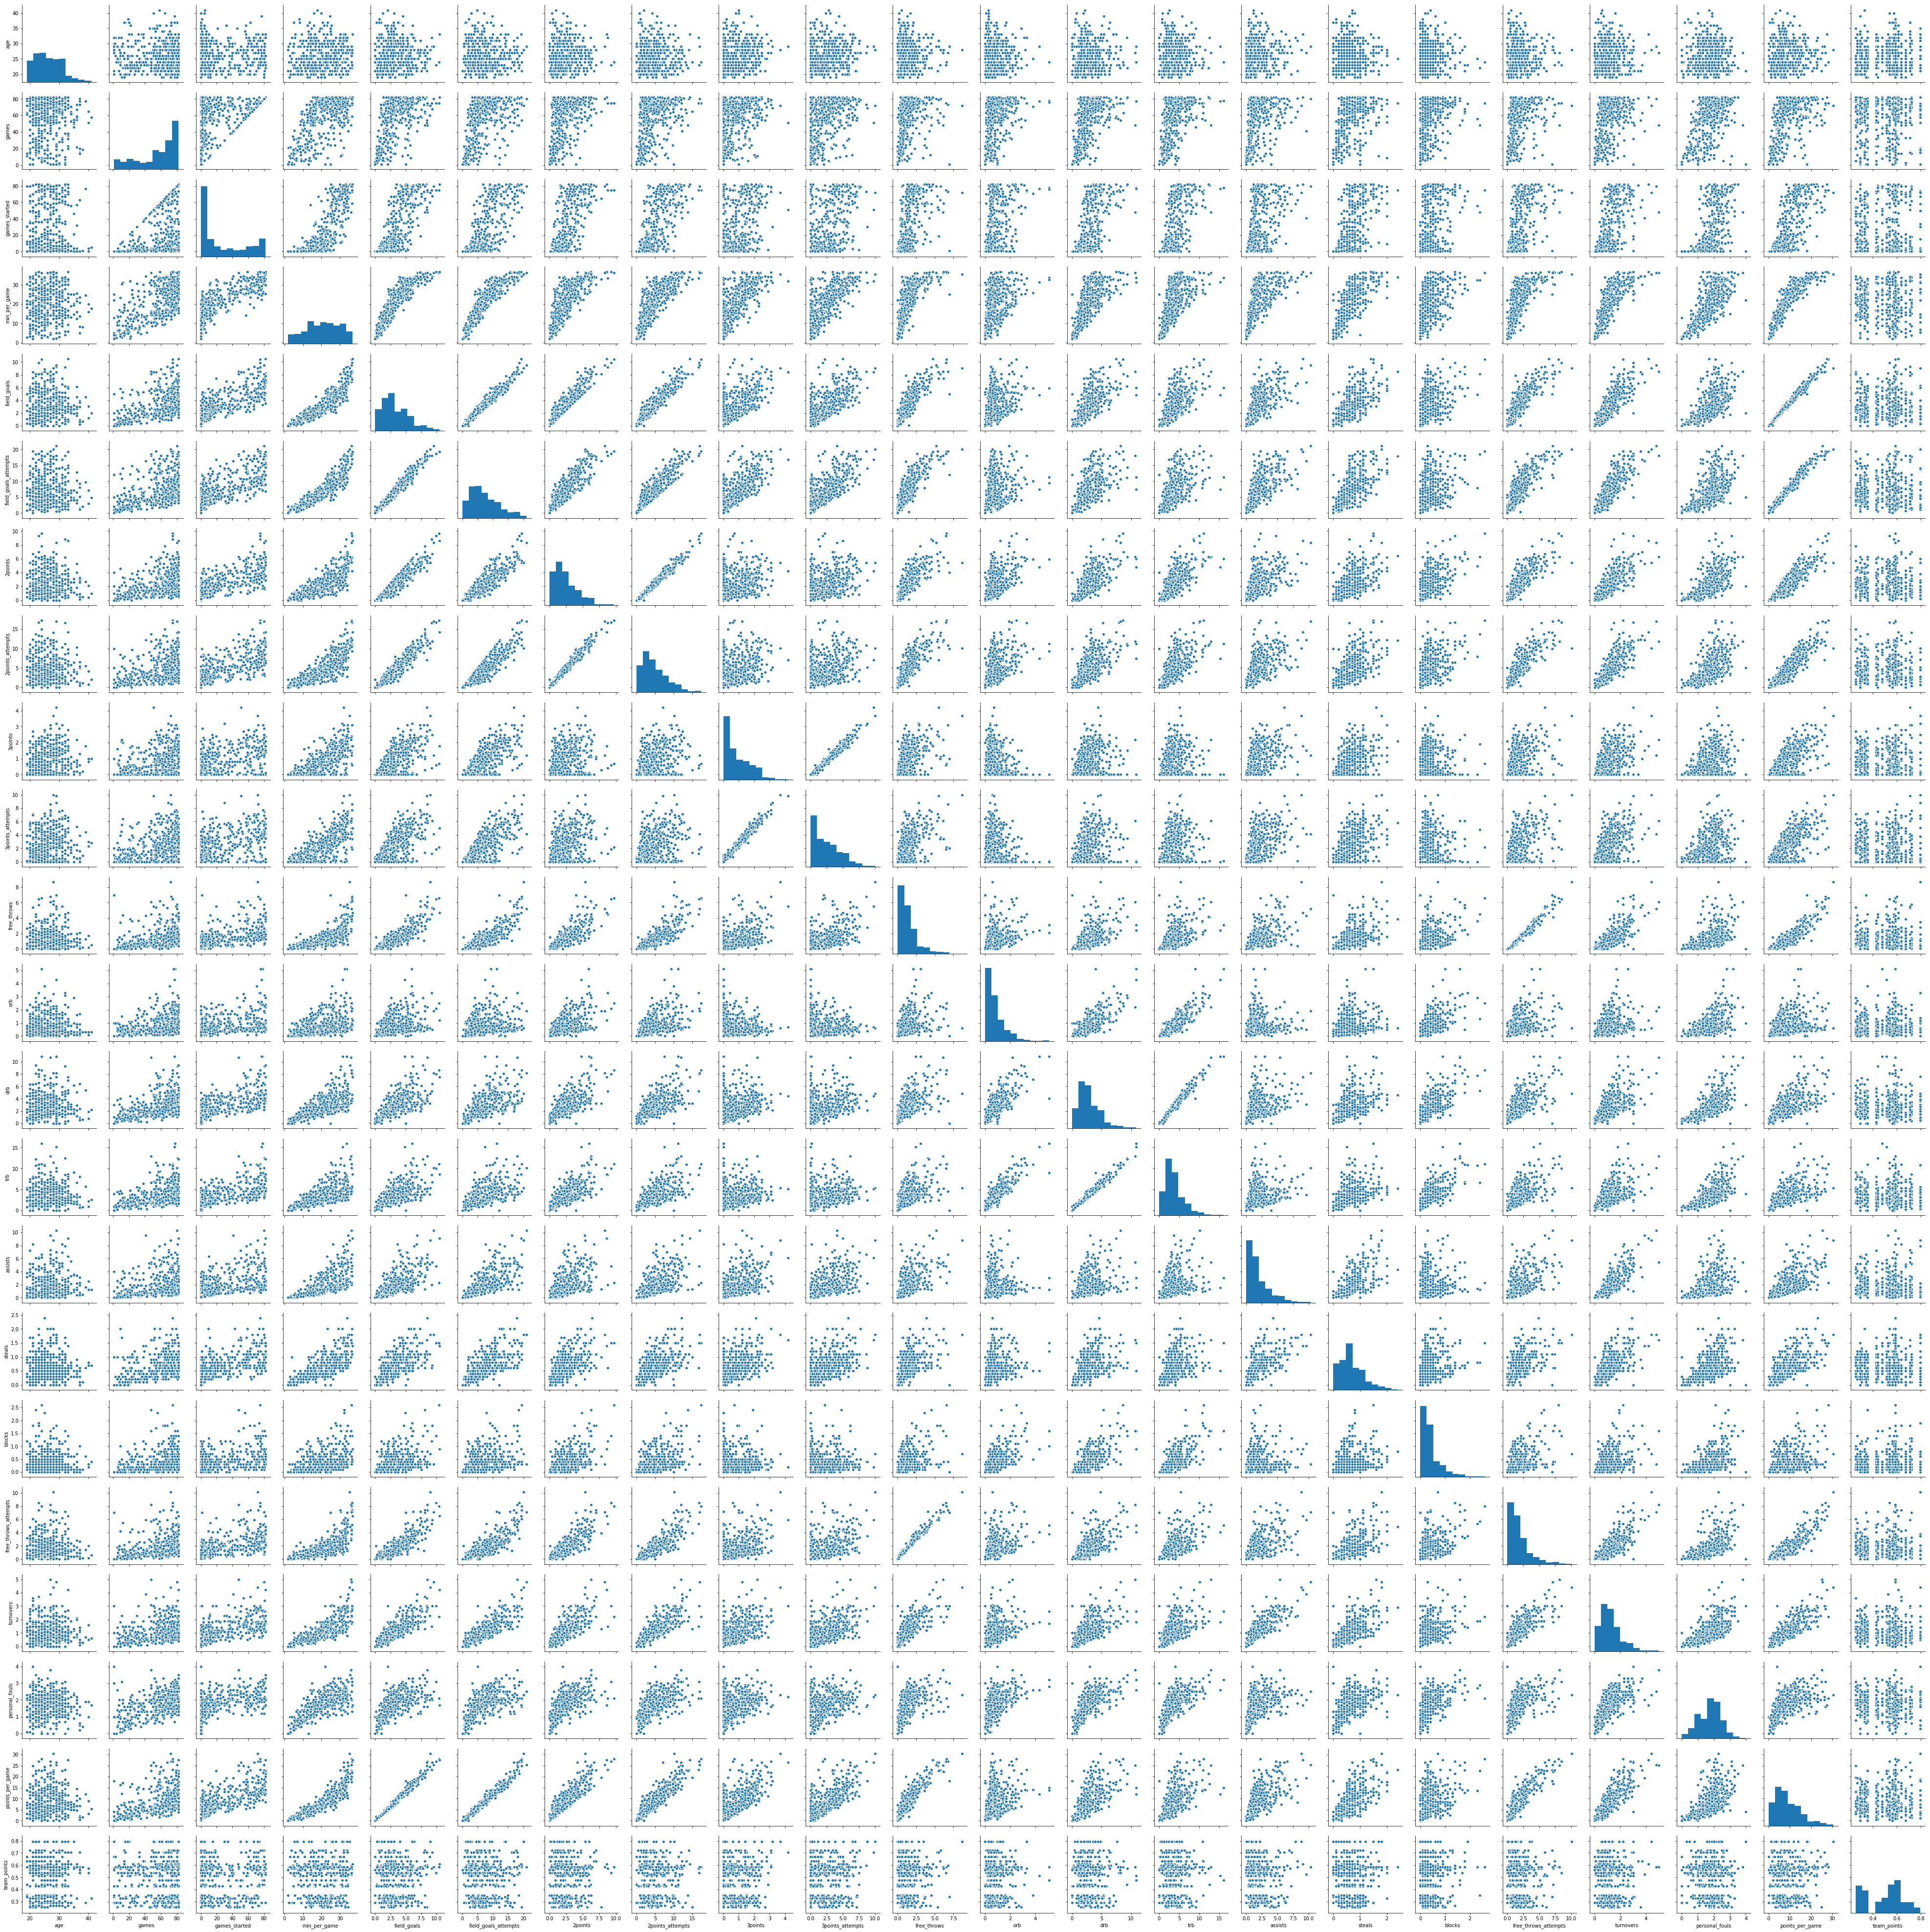

In [14]:
X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
              '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
              'turnovers', 'personal_fouls', 'points_per_game', 'team_points']]  
import seaborn as sns
sns.pairplot(data = X)

## Linear Regression
<li> keeping all varibles

In [9]:
# Linear regression on variables with no missing values
# Note that some columns have missing values 
# '3points_pct', '2points_pct', 'efg_pct', 'personal_fouls'

import statsmodels.api as sm

X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts',
              '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts',
              'turnovers', 'personal_fouls', 'points_per_game', 'team_points']]  ## independent variables

y = All_data['salary']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     26.13
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           2.71e-65
Time:                        20:01:31   Log-Likelihood:                -7549.9
No. Observations:                 449   AIC:                         1.515e+04
Df Residuals:                     426   BIC:                         1.524e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.214e+07   1.88e+06     -6.465      0.000   -1.58e+07   -8.45e+06
age                   5.119e+05   5.67e+04      9.028      0.000       4e+05    6.23e+05
games                -7.464e+04   1.41e+04     -5.302      0.000   -1.02e+05    -4.7e+04
games_started          7.23e+04   1.48e+04      4.874      0.000    4.31e+04    1.01e+05
min_per_game           8.79e+04   9.95e+04      0.883      0.378   -1.08e+05    2.84e+05
field_goals            1.12e+07    7.9e+06      1.417      0.157   -4.33e+06    2.67e+07
field_goals_attempts -3.187e+04   5.08e+06     -0.006      0.995      -1e+07    9.96e+06
2points              -9.358e+06    5.6e+06     -1.671      0.096   -2.04e+07    1.65e+06
2points_attempts     -8.188e+05   5.04e+06     -0.162      0.871   -1.07e+07    9.09e+06
3points              -1.243e+07   6.97e+06     -1.782      0.075   -2.61e+07    1.28e+06
3points_attempts      1.065e+06   5.09e+06      0.209      0.834   -8.94e+06    1.11e+07
free_throws           3.921e+05   3.46e+06      0.113      0.910   -6.41e+06     7.2e+06
orb                  -5.105e+06   5.03e+06     -1.015      0.311    -1.5e+07    4.78e+06
drb                  -6.252e+06   4.96e+06     -1.260      0.208    -1.6e+07     3.5e+06
trb                   6.493e+06   4.95e+06      1.311      0.190   -3.24e+06    1.62e+07
assists               6.569e+05   3.02e+05      2.173      0.030    6.28e+04    1.25e+06
steals               -3.001e+05   8.95e+05     -0.335      0.738   -2.06e+06    1.46e+06
blocks                5.862e+05   9.18e+05      0.638      0.524   -1.22e+06    2.39e+06
free_throws_attempts  7.977e+05    1.1e+06      0.726      0.468   -1.36e+06    2.96e+06
turnovers            -1.589e+06   8.87e+05     -1.791      0.074   -3.33e+06    1.55e+05
personal_fouls       -8.489e+05   6.25e+05     -1.358      0.175   -2.08e+06     3.8e+05
points_per_game       5.216e+04   3.36e+06      0.016      0.988   -6.54e+06    6.65e+06
team_points           4.014e+06   1.71e+06      2.342      0.020    6.45e+05    7.38e+06
==============================================================================
Omnibus:                       33.986   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.287
Skew:                           0.496   Prob(JB):                     2.20e-13
Kurtosis:                       4.459   Cond. No.                     3.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# #pip install yellowbrick
import sys
!{sys.executable} -m pip install yellowbrick
# #! pip install -m yellowbrick

In [72]:
import yellowbrick

## Lasso Regression
<li>Different from Rdige regression, Lasso regression performs variable selections. <li>The revised penalty allows coefficients to shrink towards exactly zero. Hence LASSO usually results into sparse models, that are easier to interpret.


In [74]:
from sklearn.model_selection import train_test_split

# Specify the features of interest and the target

# Extract the instances and target
X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
              '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
              'turnovers', 'personal_fouls', 'points_per_game', 'team_points']]
y = All_data['salary'] 

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


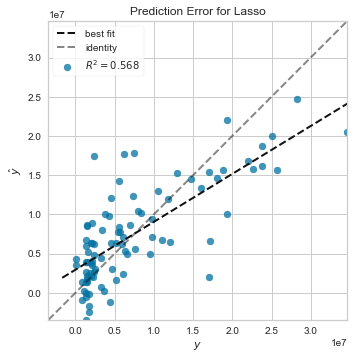

In [75]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

## Ridge Regression
<li>Ridge regression imposes a penalty on the size of the coefficients to reduce the variance of the estimates.  <li>Ridge regression works best in situations where the OLS estimates have high variances, which apply to our dataset.


135 135
linear regression train score: 0.5604363433994224
linear regression test score: 0.5831415345920445
ridge regression train score low alpha: 0.5604200249625928
ridge regression test score low alpha: 0.5836999123213901
ridge regression train score high alpha: 0.5359601055642469
ridge regression test score high alpha: 0.5847498590458193


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  Otherwise, the result is the absolute distance between *size1* and
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  Otherwise, the result is the absolute distance between *size1* and


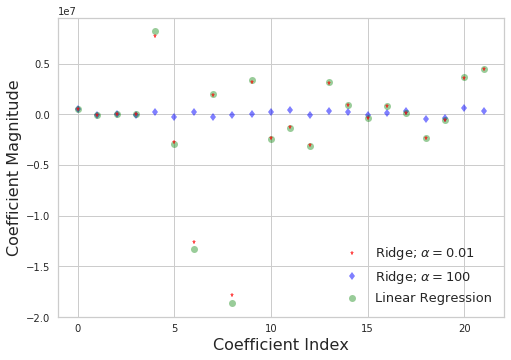

In [82]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

newX = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
              '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
              'turnovers', 'personal_fouls', 'points_per_game', 'team_points']]

newY = All_data['salary'] 


#print type(newY)# pandas core frame

X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print (len(X_test), len(y_test))
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ( "linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()


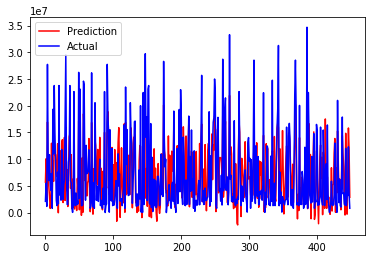

In [18]:
import matplotlib.pyplot as plt 
k=predictions.astype(int)
plt.plot(k ,label = "Prediction",color='Red')
plt.plot(y ,label='Actual',color='Blue')
plt.legend() 

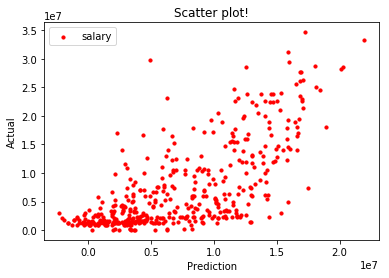

In [19]:
plt.scatter(k,y,label = "salary",color='red',s=10)
# x-axis label 
plt.xlabel('Prediction') 
# frequency label 
plt.ylabel('Actual') 
# plot title 
plt.title('Scatter plot!') 
# showing legend 
plt.legend() 

## Manual Regression Analysis

In [1]:
# # import packages
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install statsmodels
# # !{sys.executable} -m pip install datetime

### Data Cleaning

In [187]:
# try change
import pandas as pd
import numpy as np
from sklearn import preprocessing

import seaborn as sb

import statsmodels.api as sm
from sklearn.metrics import r2_score
%matplotlib inline

#data = pd.read_pickle('player_stats_year_wise.pkl')
data1516 = pd.read_pickle('tfa_working_ver_1_2015-16')
data1617 = pd.read_pickle('tfa_working_ver_1_2016-17')
data1718 = pd.read_pickle('tfa_working_ver_1')
data1819 = pd.read_pickle('tfa_working_ver_1_2018-19')
data1516

player_rank              player pos  age  games  games_started  \
0            62        aaron brooks  PG   31     69              0   
1           159        aaron gordon  PF   20     78             37   
2           185      aaron harrison  SG   21     21              0   
3           349       adreian payne  PF   24     52              2   
4           207          al horford   C   29     82             82   
5           222        al jefferson   C   31     47             18   
6            14       alan anderson  SG   33     13              0   
7           457       alan williams  PF   23     10              0   
8            70          alec burks  SG   24     31              3   
9           262            alex len   C   22     78             46   
10          411      alex stepheson  PF   28      8              0   
11            5       alexis ajinca   C   27     59             17   
12           11      alfarouq aminu  SF   25     82             82   
13           99        allen crabbe  SG   23     81              8   
14          152          alonzo gee  SF   28     73             38   
15          413    amare stoudemire   C   33     52             36   
16          228        amir johnson  PF   28     79             76   
17          436    anderson varejao   C   33     53              0   
18          121      andre drummond   C   22     81             81   
19          214      andre iguodala  SF   32     65              1   
20          302        andre miller  PG   39     39              4   
21          373      andre roberson  SG   24     70             70   
22           33     andrea bargnani   C   30     46              0   
23           54        andrew bogut   C   31     70             66   
24          162    andrew goudelock  PG   27      8              0   
25          327    andrew nicholson  PF   26     56              0   
26          455      andrew wiggins  SF   20     81             81   
27           45     anthony bennett  PF   22     19              0   
28           63       anthony brown  SF   23     29             11   
29          107       anthony davis   C   22     61             61   
..          ...                 ...  ..  ...    ...            ...   
446         344         tony parker  PG   33     72             72   
447         406          tony snell  SF   24     64             33   
448         470         tony wroten  PG   22      8              3   
449          24        trevor ariza  SF   30     81             81   
450          57       trevor booker  PF   28     79              2   
451          69          trey burke  PG   23     64              0   
452         274          trey lyles  PF   20     80             33   
453         426    tristan thompson  PF   24     82             34   
454         106        troy daniels  SG   24     43              0   
455         259           ty lawson  PG   28     66             13   
456         132         tyler ennis  PG   21     46              7   
457         175    tyler hansbrough  PF   30     44              0   
458         234       tyler johnson  SG   23     36              5   
459         476        tyler zeller   C   26     60              3   
460         134        tyreke evans  SG   26     25             25   
461          85      tyson chandler   C   33     66             60   
462         240          tyus jones  PG   19     37              0   
463         186       udonis haslem  PF   35     37              0   
464         338      victor oladipo  SG   23     72             52   
465          80        vince carter  SG   39     60              3   
466         129     wayne ellington  SG   28     76             41   
467         235      wesley johnson  SF   28     80              9   
468         282     wesley matthews  SF   29     78             78   
469          36         will barton  SG   25     82              1   
470          83  willie cauleystein   C   22     66             39   
471         37

In [188]:
def data_clean(data):
    df = data.set_index(data.iloc[:,1]).drop(columns = 'player')
    ori_factors = df.loc[:,['games', 'games_started','min_per_game','field_goals','field_goals_pct','3points','3points_pct','2points','2points_pct', 'efg_pct','free_throws','free_throws_pct','trb','assists', 'steals', 'blocks', 'turnovers', 'personal_fouls','points_per_game', 'team_points']].dropna()
    factors = pd.DataFrame(preprocessing.scale(ori_factors))
    factors.columns = ori_factors.columns
    factors.index = ori_factors.index
    return factors

def salary_clean(data):
    df = data.set_index(data.iloc[:,1]).drop(columns = 'player').dropna()
    salary = df.ix[:]['salary']
    salary = pd.DataFrame(preprocessing.scale(salary))
    salary.index = df.index
    return salary, df.ix[:]['salary']

# get next season salary increase or decrease
def salary_change(next_salary, salary):
    df = pd.concat([next_salary, salary],axis = 1).dropna()
    change = df.iloc[:,0] - df.iloc[:,1]
    return change

In [189]:
factors1516 = data_clean(data1516)
factors1617 = data_clean(data1617)
factors1718 = data_clean(data1718)
factors1819 = data_clean(data1819)

(salary1516, ori_salary1516) = salary_clean(data1516)
(salary1617, ori_salary1617) = salary_clean(data1617)
(salary1718, ori_salary1718) = salary_clean(data1718)

orisalary_change1617 = salary_change(ori_salary1617, ori_salary1516)
orisalary_change1718 = salary_change(ori_salary1718, ori_salary1617)

salary_change1617 = salary_change(salary1617, salary1516)
salary_change1718 = salary_change(salary1718, salary1617)
# salary_delta18
factors1718

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label b

games  games_started  min_per_game  field_goals  \
player                                                                   
aaron brooks       -1.219021      -0.958340     -1.863683    -1.238253   
aaron gordon       -0.021951       0.974543      1.327611     1.395320   
abdel nader        -0.482362      -0.958340     -1.272703    -1.191225   
al horford          0.622625       1.492279      1.173956     0.736927   
al jefferson       -1.034856      -0.958340     -0.977213    -0.203635   
alec burks          0.254296      -0.958340     -0.610805    -0.391748   
alex abrines        0.760748      -0.716730     -0.776279    -0.956085   
alex len            0.484501      -0.544151     -0.173479    -0.203635   
alfarouq aminu      0.484501       1.319701      0.984842    -0.109579   
alfonzo mckinnie   -2.047761      -0.992856     -2.111895    -1.379338   
allen crabbe        0.760748       1.354216      0.902105     0.454758   
amir johnson        0.714707      -0.371572     -0.693542    -0.767972   
andre drummond      0.898871       1.699374      1.422167     1.160180   
andre iguodala      0.254296      -0.751245      0.429320    -0.579860   
andre roberson     -0.896733       0.353259      0.582975    -0.626888   
andrew harrison    -0.114033       0.594869      0.240207    -0.156607   
andrew wiggins      1.083036       1.837437      1.729477     1.583433   
anthony davis       0.760748       1.595827      1.741297     3.229416   
anthony tolliver    0.944913      -0.509635      0.062913    -0.344719   
aron baynes         1.036995       1.319701     -0.398052    -0.438776   
arron afflalo      -0.252157      -0.889308     -1.036311    -1.097169   
austin rivers       0.116172       1.043574      1.422167     0.972067   
avery bradley      -0.574445       0.594869      1.126677     0.972067   
bam adebayo         0.484501      -0.337056     -0.220758    -0.485804   
ben mclemore       -0.114033      -0.406088     -0.256217    -0.344719   
ben simmons         1.036995       1.802921      1.422167     1.489377   
bismack biyombo     1.083036      -0.129962     -0.409872    -0.626888   
blake griffin      -0.021951       1.009059      1.457626     1.865601   
bobby brown        -1.771514      -0.992856     -1.875503    -1.191225   
bobby portis        0.668666      -0.854793      0.098371     0.783955   
...                      ...            ...           ...          ...   
troy williams      -1.725473      -0.958340     -0.835377    -0.532832   
tyler cavanaugh    -0.896733      -0.958340     -0.989032    -0.862029   
tyler dorsey       -0.114033      -0.820277     -0.504428    -0.438776   
tyler ennis        -0.206116      -0.613182     -1.071770    -0.862029   
tyler johnson       0.622625       0.353259      0.807548     0.360702   
tyler ulis          0.576584       0.491322      0.204748    -0.250663   
tyler zeller        0.346378       0.180680     -0.575346    -0.344719   
tyreke evans       -0.298198       0.111649      1.091218     1.630461   
tyus jones          1.083036      -0.613182     -0.445330    -0.815000   
udonis haslem      -2.047761      -0.992856     -1.958240    -1.567450   
vander blue        -2.462131      -0.992856     -1.497275    -1.567450   
victor oladipo      0.760748       1.595827      1.457626     2.335882   
vince carter       -0.021951      -0.820277     -0.468970    -0.720944   
wade baldwin       -2.370049      -0.992856     -1.213605    -0.720944   
wayne ellington     0.852830      -0.923824      0.571156     0.078533   
wayne selden       -1.080897      -0.682214     -0.220758    -0.109579   
wesley iwundu       0.162213      -0.578666     -0.610805    -0.956085   
wesley johnson      0.714707       0.387775     -0.185299    -0.720944   
wesley matthews     0.208255       1.147122      1.433987     0.454758   
will barton         1.036995       0.387775      1.351250     1.019096   
willie cauleystein  0.668666       1.009059      0.748450     0.830983   
willie reed        -0.75860

### Regression Function

In [190]:
# factors, salary are operated data

def regression(salary, factors):
    if isinstance(factors, pd.Series): factors = pd.DataFrame(factors)
    
    factor_index = list(factors.columns)
    stat_value = pd.Series(factor_index)

    corr_single_list = []
    t_single_list = []
    rsquare_single_list = []
    
    row = len(factors)
    col = len(factors.columns)
    
    for s in range(col):
        xy = pd.concat([salary, factors.iloc[:,s]], axis=1).dropna()
        # print(salary,factors.iloc[:,s])
        # corr between single x and y
        corr = xy.corr().iloc[0,1]
        y = xy.iloc[:,0]
        x = xy.iloc[:,1]
        beta = sum((x-np.mean(x))*(y-np.mean(y)))/sum((x-np.mean(x))**2) 
        const = np.mean(y)-beta*np.mean(x)          
        # variance  
        var=sum((y-const-beta*x)**2)/(len(y)-2)
        # std. var  
        sigma=np.sqrt(var) 
        # r_square
        rsquare = r2_score(y, (const+beta*x))
        #t-value  
        t=beta*np.sqrt(sum((x-np.mean(x))**2))/sigma
        
        t_single_list.append(t)
        corr_single_list.append(corr)
        rsquare_single_list.append(rsquare)
    
    t_value = pd.Series(t_single_list)        
    corr_value= pd.Series(corr_single_list)
    rsquare_value = pd.Series(rsquare_single_list)

    stat_value = pd.concat([stat_value,t_value, corr_value, rsquare_value],axis = 1)
    stat_value.columns=['factors', 't-value', 'correlation', 'r-square']
    stat_value=stat_value.set_index('factors')
    
    return stat_value, beta, const

In [191]:
# regression between factors and next season's -zscored salary changes(next season's salary is based on this season's factors)
(stat_value1516, beta, const) = regression(salary_change1617, factors1516)
(stat_value1617, beta, const) = regression(salary_change1718, factors1617)
pd.concat([stat_value1516, stat_value1617],axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/

t-value  correlation      r-square   t-value  correlation  \
factors                                                                       
games            2.192600     0.119473  1.427372e-02  2.255389     0.122843   
games_started    0.556134     0.030508  9.307135e-04  3.013166     0.163153   
min_per_game     1.622451     0.088693  7.866389e-03  2.341451     0.127456   
field_goals      2.120487     0.115597  1.336259e-02  1.519418     0.083100   
field_goals_pct  0.290492     0.015941  2.541087e-04  1.805891     0.098628   
3points          2.349706     0.127898  1.635784e-02  2.600496     0.141289   
3points_pct      1.213594     0.066457  4.416580e-03  0.390796     0.021443   
2points          1.418632     0.077623  6.025270e-03  0.693043     0.038008   
2points_pct      0.526313     0.028873  8.336595e-04  2.375991     0.129305   
efg_pct          1.352573     0.074028  5.480206e-03  2.787473     0.151223   
free_throws      1.304812     0.071428  5.101955e-03  0.743988     0.040798   
free_throws_pct  0.734790     0.040294  1.623615e-03 -0.260833    -0.014314   
trb              0.641411     0.035180  1.237646e-03  0.761607     0.041762   
assists          0.001017     0.000056  3.114834e-09  1.205457     0.066014   
steals           0.228953     0.012564  1.578656e-04  2.934119     0.158983   
blocks           0.033609     0.001845  3.402264e-06  1.432028     0.078351   
turnovers        0.135926     0.007460  5.564675e-05  1.402492     0.076745   
personal_fouls  -0.065462    -0.003593  1.290739e-05  2.600780     0.141304   
points_per_game  2.150872     0.117230  1.374298e-02  1.590190     0.086943   
team_points      0.498948     0.027373  7.492863e-04  1.653045     0.090352   

                 r-square  
factors                    
games            0.015090  
games_started    0.026619  
min_per_game     0.016245  
field_goals      0.006906  
field_goals_pct  0.009727  
3points          0.019963  
3points_pct      0.000460  
2points          0.001445  
2points_pct      0.016720  
efg_pct          0.022868  
free_throws      0.001664  
free_throws_pct  0.000205  
trb              0.001744  
assists          0.004358  
steals           0.025275  
blocks           0.006139  
turnovers        0.005890  
personal_fouls   0.019967  
points_per_game  0.007559  
team_points      0.008163

### Prediction Analysis (using pre_data)

In [192]:
def t_signal(stat_value):
    t_table = stat_value.iloc[:,0] # fetch t-values

    num = len(t_table)
    t_signal = pd.Series(np.zeros(num), index=t_table.index)

    for i in range(num):
        if t_table[i] >= 1.4: t_signal[i] = 1             # t-value > 0: positive factor，+1
        elif t_table[i] <= -1.4: t_signal[i] = -1        # t-value < 0: negative factor，+1
        else: t_signal[i] = 0
    return t_signal


def final_score(next_factors,factors, t_signal):            
    name_index = list(next_factors.index & factors.index)       # players appear both in 2017 and 2018
    score = []
    for name in name_index:
        delta = next_factors.loc[name] - factors.loc[name]
        score.append(sum(np.sign(delta) * t_signal))
    
    final_score = pd.Series(score, index = name_index)
    return final_score

In [193]:
t_signal1516 = t_signal(stat_value1516)
t_signal1617 = t_signal(stat_value1617)

final_score1516 = final_score(factors1617,factors1516,t_signal1516)
final_score1617 = final_score(factors1718,factors1617,t_signal1516)   # here,suppose the posi & nege info remains to the next year
final_score1718 = final_score(factors1819,factors1718,t_signal1617)
score_table = pd.concat([final_score1718, final_score1617],axis=1).dropna()
score_table.columns = ['2017-18','2016-17']
score_table

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


2017-18  2016-17
aaron gordon                4.0      4.0
al horford                 -4.0     -4.0
alec burks                  2.0      2.0
alex abrines                4.0     -4.0
alex len                    6.0     -4.0
alfarouq aminu             -4.0      4.0
allen crabbe               -8.0      2.0
amir johnson               -4.0     -6.0
andre drummond             -6.0      0.0
andre iguodala             -8.0     -6.0
andrew harrison           -14.0      4.0
andrew wiggins            -10.0     -6.0
anthony davis              -4.0     -4.0
anthony tolliver           -6.0      2.0
austin rivers              -8.0      4.0
avery bradley              -4.0     -6.0
ben mclemore              -12.0     -6.0
blake griffin              14.0     -4.0
bobby portis               -6.0      6.0
bojan bogdanovic            4.0      2.0
bradley beal               -4.0      0.0
brandon ingram             -6.0      2.0
brook lopez                 2.0     -6.0
bryn forbes                10.0      6.0
buddy hield                10.0      4.0
cameron payne              -6.0      4.0
caris levert                6.0      6.0
carmelo anthony            -4.0     -2.0
chris paul                 -4.0     -2.0
cj mccollum                -4.0     -2.0
...                         ...      ...
thaddeus young            -10.0      4.0
thon maker                 -2.0      4.0
tim frazier                -4.0     -6.0
tim hardaway                0.0      4.0
timothe luwawucabarrot     -8.0     -4.0
tj mcconnell               -6.0     -4.0
tj warren                  -2.0      2.0
tobias harris               4.0      2.0
tomas satoransky          -10.0      6.0
tony parker                 2.0     -6.0
tony snell                 -4.0     -6.0
trevor ariza               -6.0     -6.0
trey lyles                  2.0      6.0
troy daniels              -10.0      0.0
troy williams              10.0     -6.0
tyler johnson              -4.0     -4.0
tyreke evans               -6.0      6.0
tyus jones                 -8.0      6.0
victor oladipo            -10.0      6.0
vince carter                4.0     -6.0
wayne ellington            -4.0      2.0
wayne selden               -6.0      6.0
wesley johnson             -4.0      6.0
wesley matthews             0.0     -6.0
will barton                 4.0      6.0
willie cauleystein          6.0      2.0
willy hernangomez           8.0     -6.0
wilson chandler            -6.0     -2.0
yogi ferrell               -6.0      2.0
zach lavine                 6.0     -6.0

[255 rows x 2 columns]

In [194]:
# players perform much better than the last year
top = 15 # choose top 15 of them
top_potential = data1516.iloc[:top,:2]
top_potential.columns = ['2017-18','2016-17']

top_potential.iloc[:,0] = final_score1718.nlargest(top).index
top_potential.iloc[:,1] = final_score1617.nlargest(top).index
top_potential

2017-18           2016-17
0        blake griffin      bobby portis
1   dorian finneysmith       bryn forbes
2          jake layman      caris levert
3        malik beasley       david nwaba
4           malik monk     davis bertans
5         nik stauskas      delon wright
6         zach collins  denzel valentine
7          cody zeller    derrick favors
8          danny green      devin harris
9         derrick rose     dwight powell
10    juan hernangomez      etwaun moore
11         mike conley     fred vanvleet
12     nemanja bjelica       gary harris
13       pascal siakam     isaiah taylor
14         bryn forbes         ish smith

In [209]:
# salary prediction in 2018-19
(stat, beta, const) = regression(final_score1617, salary_change1718)
# print(stat, beta, const)
new_delta1819 = const + beta * final_score1718 + abs(min(preprocessing.scale(const + beta * final_score1718)))
new_delta1819[new_delta1819<0]=0
new_salary1819 = (new_delta1819*np.std(ori_salary1718) + ori_salary1718).dropna()

prediction = pd.concat([new_salary1819,ori_salary1718,final_score1718],axis = 1).dropna()
prediction.columns = ['predicted 2018-19 salary','2017-18 salary','2017-18 score']
prediction

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


predicted 2018-19 salary  2017-18 salary  \
aaron gordon                        1.647198e+07       5504420.0   
al horford                          3.084319e+07      27734405.0   
alec burks                          1.984838e+07      10845506.0   
alex abrines                        1.669256e+07       5725000.0   
alex len                            1.711986e+07       4187599.0   
alfarouq aminu                      1.042782e+07       7319035.0   
alfonzo mckinnie                    1.374787e+07        815615.0   
allen crabbe                        1.858809e+07      19332500.0   
amir johnson                        1.410879e+07      11000000.0   
andre drummond                      2.491960e+07      23775506.0   
andre iguodala                      1.407041e+07      14814815.0   
andrew harrison                     5.682048e+05       1312611.0   
andrew wiggins                      6.829916e+06       7574322.0   
anthony davis                       2.688429e+07      23775506.0   
anthony tolliver                    4.434092e+06       3290000.0   
aron baynes                         3.583594e+06       4328000.0   
austin rivers                       1.108059e+07      11825000.0   
avery bradley                       1.191778e+07       8808989.0   
bam adebayo                         1.542262e+07       2490360.0   
ben mclemore                        4.455594e+06       5200000.0   
blake griffin                       5.030394e+07      29512900.0   
bobby portis                        2.660412e+06       1516320.0   
bogdan bogdanovic                   1.257940e+07       9470614.0   
bojan bogdanovic                    2.146756e+07      10500000.0   
bradley beal                        2.688429e+07      23775506.0   
brandon ingram                      6.663492e+06       5519400.0   
brook lopez                         3.164522e+07      22642350.0   
bryn forbes                         1.817426e+07       1312611.0   
buddy hield                         2.053713e+07       3675480.0   
caleb swanigan                      1.046879e+07       1465920.0   
...                                          ...             ...   
tim hardaway                        2.353818e+07      16500000.0   
timothe luwawucabarrot              6.421938e+05       1386600.0   
tj mcconnell                        2.615474e+06       1471382.0   
tj warren                           8.226412e+06       3152931.0   
tobias harris                       2.696756e+07      16000000.0   
tomas satoransky                    2.255594e+06       3000000.0   
tony parker                         2.445600e+07      15453126.0   
tony snell                          1.293022e+07       9821429.0   
trevor ariza                        8.565004e+06       7420912.0   
trey lyles                          1.144427e+07       2441400.0   
troy daniels                        2.664114e+06       3408520.0   
troy williams                       1.833303e+07       1471382.0   
tyler dorsey                        7.120877e+04        815615.0   
tyler johnson                       8.990047e+06       5881260.0   
tyreke evans                        4.434092e+06       3290000.0   
tyus jones                          7.269758e+05       1471382.0   
victor oladipo                      2.025559e+07      21000000.0   
vince carter                        1.896756e+07       8000000.0   
wayne ellington                     9.378787e+06       6270000.0   
wayne selden                        2.456703e+06       1312611.0   
wesley iwundu                       1.594695e+07       1050000.0   
wesley johnson                      8.990047e+06       5881260.0   
wesley matthews                     2.492235e+07      17884176.0   
will barton                         1.450090e+07       3533333.0   
willie cauleystein                  1.663642e+07       3704160.0   
willy hernangomez                   1.633270e+07       1435750.0   
wilson chandler                     1.316095e+07      12016854.0   
yogi ferrell

### Validation

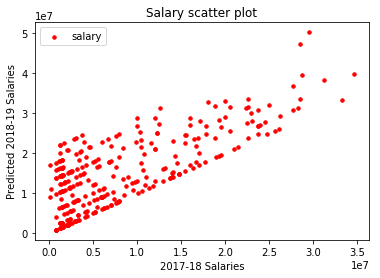

In [208]:
import matplotlib.pyplot as plt
x = prediction.iloc[:,1]  # 2017-18 Salary
y = prediction.iloc[:,0]  # predicted 2018-19 salary
plt.scatter(x,y,label = "salary",color='red',s=12)
# x-axis label 
plt.xlabel('2017-18 Salaries') 
# frequency label 
plt.ylabel('Predicted 2018-19 Salaries') 
# plot title 
plt.title('Salary scatter plot') 
# showing legend 
plt.legend() 